# ECSE 415 - Assignment 1
  ## Patrick Erath - 260719203

# 1 - Thresholding

## 1.1 

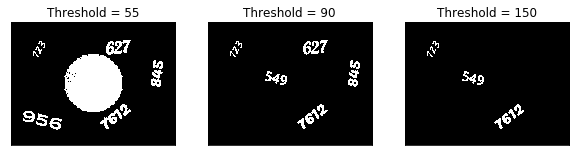

In [203]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# import image
image_path = "./numbers.jpg"
img = cv2.imread(image_path)

# convert to grayscale, ie RGB -> [0,1] 
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
height, width = img_gray.shape

THRESHOLDS = [55, 90, 150]

# Create placeholder matrix for the outputs
imgs_thres = [0, 0, 0]
for i in range(3):
    imgs_thres[i] = np.zeros((height, width), dtype=np.uint8)
    
# same operation w/o loops
ret1, img_thres1 = cv2.threshold(img_gray, THRESHOLDS[0], 255, cv2.THRESH_BINARY)
ret2, img_thres2 = cv2.threshold(img_gray, THRESHOLDS[1], 255, cv2.THRESH_BINARY)
ret3, img_thres3 = cv2.threshold(img_gray, THRESHOLDS[2], 255, cv2.THRESH_BINARY)

# display
plt.figure(figsize=(10, 3))
plt.subplot(131), plt.imshow(img_thres1, cmap='gray')
plt.title("Threshold = 55"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_thres2, cmap='gray')
plt.title("Threshold = 90"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_thres3, cmap='gray')
plt.title("Threshold = 150"), plt.xticks([]), plt.yticks([])
plt.show()

## 1.2 

Observations:

As can be seen from above, the three different threholds (55, 90 and 150) have significantly different effects on the images. The original image has a circular gradient background which is dark on the outside, and becomes lighter towards the inside. Thus, when we use a low threshold of 55, a certain radius of the circular gradient gets turned to white, as the grayscale values are higher than 55. This white circle segments the number "549".

A higher threshold of 90 is much better at ignoring the background gradient, as the circular gradient doesn't go as high as 90 on the grayscale. With a threshold of 90 however we lose the number "956" as its grayscale pixel values was lower than 90.

The highest threshold of 150 only displays the lightest (or whitest) pixels, therefore the numbers "845" and "627" are also removed, and only the values "123", "549" and "7812" remain. 

In conclusion:
   - At a threshold of 55:  6 numbers are segmented: 123, 627, 845, 956, 7612. The number 549 cannot be seen
   - At a threshold of 90:  5 numbers are segmented: 123, 549, 627, 845, 7612. The number 956 cannot be seen
   - At a threshold of 150:  3 numbers are segmented, we can see 123, 549, 7612 but the following numbers are missing :"845","627" AND "956".



## 1.3

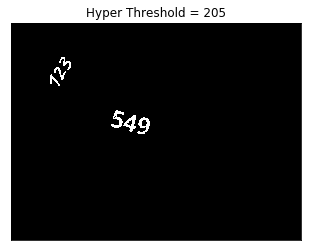

In [204]:
# This hyper-parameter was found by trial and error

HYPER_THRESHOLD = 205
ret_h, img_h_thres = cv2.threshold(img_gray, HYPER_THRESHOLD, 255, cv2.THRESH_BINARY)
plt.imshow(img_h_thres, cmap='gray')
plt.title("Hyper Threshold = 205"), plt.xticks([]), plt.yticks([])
plt.show()

# 2 - Filtering

## 2.1 - Denoising

### 2.1.1

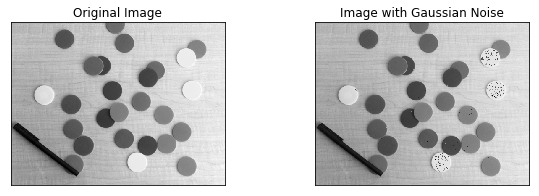

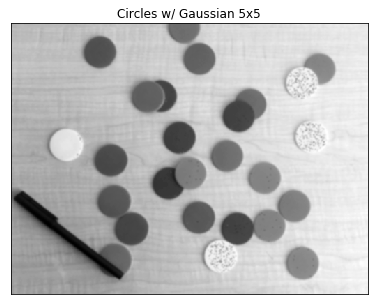

In [205]:
# Load image and path
img_clean_path = "./Circles.png"
img_gauss_path = "./Circles_gauss.png"

# Read images
img_clean = cv2.imread(img_clean_path, cv2.IMREAD_GRAYSCALE)
img_noisy = cv2.imread(img_gauss_path, cv2.IMREAD_GRAYSCALE)

# Filter image using 5x5, sigmaX = 0 
res1 = cv2.GaussianBlur(img_noisy, (5,5), 0) 

plt.figure(figsize=(10, 3))
plt.subplot(121), plt.imshow(img_clean, cmap='gray')
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_noisy, cmap='gray')
plt.title("Image with Gaussian Noise"), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(10, 5))
plt.imshow(res1, cmap='gray')
plt.title("Circles w/ Gaussian 5x5"), plt.xticks([]), plt.yticks([])
plt.show()

### 2.1.2

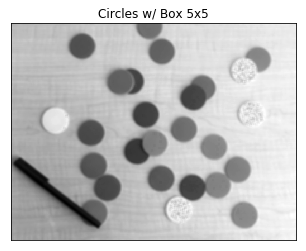

In [206]:
# Filter using Box
res2 = cv2.blur(img_noisy, (5,5))

plt.imshow(res2, cmap='gray')
plt.title("Circles w/ Box 5x5"), plt.xticks([]), plt.yticks([])
plt.show()

### 2.1.3

In [207]:
# Calculating Peak Signal to Noise Ratio (PSNR)
PSNR_Gaussian = cv2.PSNR(img_clean, res1)
PSNR_Box = cv2.PSNR(img_clean, res2)

print("PSNR Gaussian \t", PSNR_Gaussian)
print("PSNR Box Filter \t", PSNR_Box)

PSNR Gaussian 	 34.45888479026088
PSNR Box Filter 	 32.64650460360563


The PSNR for the Box Filter is higher than that of the Gaussian Filter. PSNR is defined as the ratio of between "maximum possible power of a signal and the power of corrupting noise". Thus, it makes sense that the PSNR of a Box filter is higher, because a Gaussian Filter gives less weight to the surroundings pixels, whereas a BoxFilter has a kernel which attributes equal weight to all pixels. Thus a BoxFilter is in general less accurate and has more noise than a Gaussian Filter.

### 2.1.4

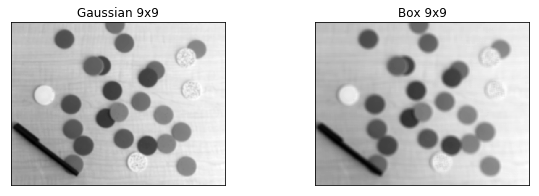

PSNR Gaussian 	 32.68002449425201
PSNR Box Filter 	 29.700705335960464


In [208]:
# Setting the size of Gaussian Filter to 9x9 and Box Filter to 13x13

# Filter Using Gaussian for 9
res3 = cv2.GaussianBlur(img_noisy, (9,9), 0)

# Filter Using Box Filter for 9 
res4 = cv2.blur(img_noisy, (9,9))

plt.figure(figsize=(10, 3))
plt.subplot(121), plt.imshow(res3, cmap='gray')
plt.title("Gaussian 9x9"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(res4, cmap='gray')
plt.title("Box 9x9"), plt.xticks([]), plt.yticks([])
plt.show()

# Calculating Peak Signal to Noise Ratio (PSNR)
PSNR_Gaussian = cv2.PSNR(img_clean, res3)
PSNR_Box = cv2.PSNR(img_clean, res4)

print("PSNR Gaussian \t", PSNR_Gaussian)
print("PSNR Box Filter \t", PSNR_Box)

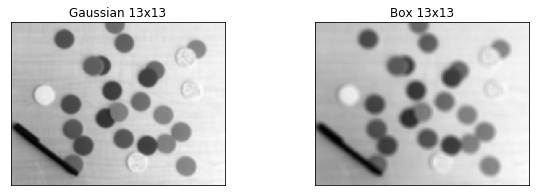

PSNR Gaussian 	 31.195207041592482
PSNR Box Filter 	 27.763219472183856


In [209]:
# Filter Using Gaussian for 9
res3 = cv2.GaussianBlur(img_noisy, (13,13), 0)

# Filter Using Box Filter for 9 
res4 = cv2.blur(img_noisy, (13,13))

plt.figure(figsize=(10, 3))
plt.subplot(121), plt.imshow(res3, cmap='gray')
plt.title("Gaussian 13x13"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(res4, cmap='gray')
plt.title("Box 13x13"), plt.xticks([]), plt.yticks([])
plt.show()

# Calculating Peak Signal to Noise Ratio (PSNR)
PSNR_Gaussian = cv2.PSNR(img_clean, res3)
PSNR_Box = cv2.PSNR(img_clean, res4)

print("PSNR Gaussian \t", PSNR_Gaussian)
print("PSNR Box Filter \t", PSNR_Box)

It can be observed that as we increase the kernel size from 5, to 9 to 13, the PSNR increases. The PSNR increases for both Gaussian and Box Filter, for example PSNR_Gaussian_9 = 10.626 < PSNR_Gaussian_13 = 10.672, also PSNR_Box_9 = 10.736 < PSNR_Box_13 = 10.84. 

It could be observed however that increasing the kernel size increases the PSNR at a faster rate for a Box Filter than a Gaussian Filter. 

It can also be seen qualitatively that the overall image quality decreases, nonetheless, the "noise" present on 3 of the yellow "chips" has virtually disappeared in the Box 13x13 case. 

### 2.1.5

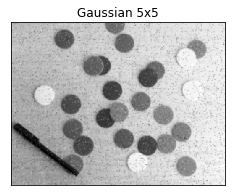

In [210]:
img_noisy = cv2.imread('Circles_sp.png', cv2.IMREAD_GRAYSCALE)
img_filt = cv2.GaussianBlur(img_noisy, (5,5), 0)

plt.figure(figsize=(10, 3))
plt.imshow(img_filt, cmap='gray')
plt.title("Gaussian 5x5"), plt.xticks([]), plt.yticks([])
plt.show()

### 2.1.6

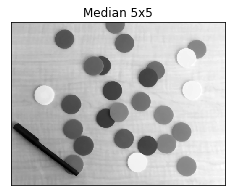

In [211]:
img_filt2 = cv2.medianBlur(img_noisy, 5)

plt.figure(figsize=(10, 3))
plt.imshow(img_filt2, cmap='gray')
plt.title("Median 5x5"), plt.xticks([]), plt.yticks([])
plt.show()

### 2.1.7

In [212]:
print("Gaussian Filter 5x5 PSNR:",cv2.PSNR(img_clean, img_filt))
print("Median Filter 5x5 PSNR",cv2.PSNR(img_clean, img_filt2))

Gaussian Filter 5x5 PSNR: 28.964408033279128
Median Filter 5x5 PSNR 37.32623206399119


As can be seen from above the PSNR of the image with the median filter is higher than the one of the image with the gaussian filter. Therefore, the median filter gives better image quality and gives a better result.

### 2.1.8

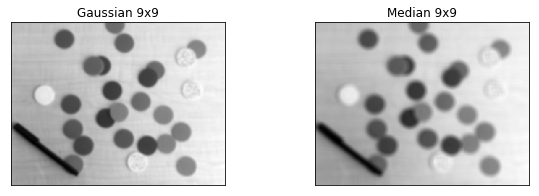

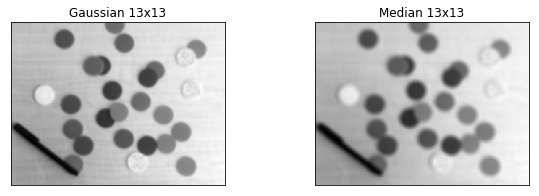

Gaussian Filter 9x9 PSNR: 30.63622853754954
Median Filter 9x9 PSNR 34.606305508872886
Gaussian Filter 13x13 PSNR: 30.256604778951548
Median Filter 13x13 PSNR 32.55737787662019


In [213]:
# Gaussian and Median 9x9
img_filt3 = cv2.GaussianBlur(img_noisy, (9,9), 0)
img_filt4 = cv2.medianBlur(img_noisy, 9)

# Gaussian and Median 13x13
img_filt5 = cv2.GaussianBlur(img_noisy, (13,13), 0)
img_filt6 = cv2.medianBlur(img_noisy, 13)

plt.figure(figsize=(10, 3))
plt.subplot(121), plt.imshow(res3, cmap='gray')
plt.title("Gaussian 9x9"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(res4, cmap='gray')
plt.title("Median 9x9"), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(10, 3))
plt.subplot(121), plt.imshow(res3, cmap='gray')
plt.title("Gaussian 13x13"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(res4, cmap='gray')
plt.title("Median 13x13"), plt.xticks([]), plt.yticks([])
plt.show()

print("Gaussian Filter 9x9 PSNR:",cv2.PSNR(img_clean, img_filt3))
print("Median Filter 9x9 PSNR",cv2.PSNR(img_clean, img_filt4))
print("Gaussian Filter 13x13 PSNR:",cv2.PSNR(img_clean, img_filt5))
print("Median Filter 13x13 PSNR",cv2.PSNR(img_clean, img_filt6))

As can be seen from above, as the filter size increases, the PSNR decreases in both cases. What can be observed is that increasing the kernel size of a filter results in a decreased performance of the filter in both cases. Nonetheless, it can be seen that the median filter still has the higher PSNR thus it is still more effective.

## 2.2 - Sharpening

### 2.2.1

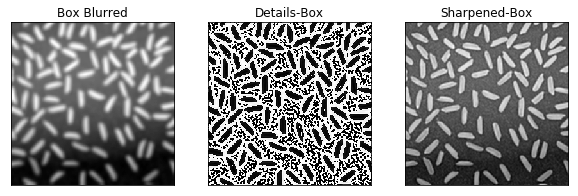

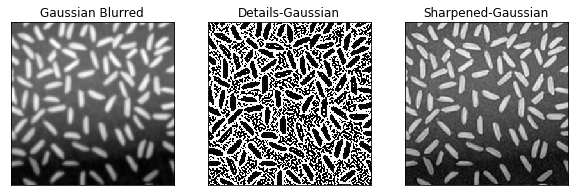

In [214]:
# Sharpen the rice.png:

img_path = "./rice.png"
img = cv2.imread(img_path)

# Convert image to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
height, width = img_gray.shape

# Created Blurred image using 7x7 Box, and make new copy
img_blur_box = cv2.blur(img_gray, (7,7))

# Create Blurred image using 7x7 Gaussian
img_blur_gaus = cv2.GaussianBlur(img_gray, (7,7), 0)

#1. Details (D) = original (I) - blurred (B)
# Replace each pixel
details_box = img_gray - img_blur_box
details_gaus = img_gray - img_blur_gaus

#2. Sharpened(S) = original (I) + details(D)
# Replace each pixel
sharp_box = img_gray + details_box
sharp_gaus = img_gray + details_gaus
 
# Display
plt.figure(figsize=(10, 3))
plt.subplot(131), plt.imshow(img_blur_box, cmap='gray')
plt.title("Box Blurred"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(details_box, cmap='gray')
plt.title("Details-Box"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(sharp_box, cmap='gray')
plt.title("Sharpened-Box"), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(10, 3))
plt.subplot(131), plt.imshow(img_blur_gaus, cmap='gray')
plt.title("Gaussian Blurred"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(details_gaus, cmap='gray')
plt.title("Details-Gaussian"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(sharp_gaus, cmap='gray')
plt.title("Sharpened-Gaussian"), plt.xticks([]), plt.yticks([])
plt.show()

### 2.2.2

A Box Filter, unlike a Gaussian Filter, cannot distinguish between random noise and edges. This is because a 5x5 Box Filter weighs each pixel equally, whereas a Gaussian filter gives more weight to pixels closer to the one being filtered. 

As such, a Gaussian filter allows for a better blurred image, which in turn results in a more precise detailed image and finally a better sharpened image. In the above problem however, we do not note a very big difference between the two images qualitatively.    

# 3 - Edge Detection 

## 3.1 - Sobel edge detection

### 3.1.1 - Effect of sharpening on edge detection

Applying a sobel edge detector with kernel size 5

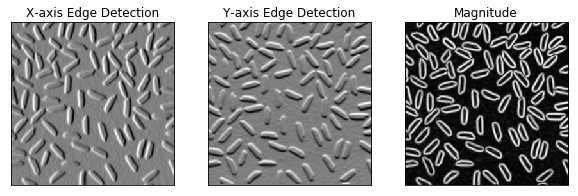

In [215]:
kernel = np.ones((5, 5), np.float32)/(5*5)
# Applying intensity channels
I_x = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=5)
I_y = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=5)
I_m = cv2.magnitude(I_x, I_y)

# Plot
plt.figure(figsize=(10, 3))
plt.subplot(131), plt.imshow(I_x, cmap='gray')
plt.title("X-axis Edge Detection"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(I_y, cmap='gray')
plt.title("Y-axis Edge Detection"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(I_m, cmap='gray')
plt.title("Magnitude"), plt.xticks([]), plt.yticks([])
plt.show()

Applying Sobel dege detector to sharpened images (Sharpened using Box Filter and Gaussian Filter)

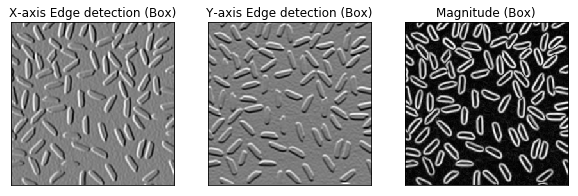

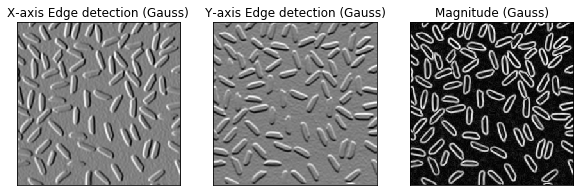

In [216]:
# Find x, y and magnitude for sharpened box image
I_x_box = cv2.Sobel(sharp_box, cv2.CV_64F, 1, 0, ksize=5)
I_y_box = cv2.Sobel(sharp_box, cv2.CV_64F, 0, 1, ksize=5)
I_m_box = cv2.magnitude(I_x, I_y)

# Find x, y and magnitude for sharpened gaussian image
I_x_gaus = cv2.Sobel(sharp_gaus, cv2.CV_64F, 1, 0, ksize=5)
I_y_gaus = cv2.Sobel(sharp_gaus, cv2.CV_64F, 0, 1, ksize=5)
I_m_gaus = cv2.magnitude(I_x_gaus, I_y_gaus)

plt.figure(figsize=(10, 3))
plt.subplot(131), plt.imshow(I_x_box, cmap='gray')
plt.title('X-axis Edge detection (Box)'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(I_y_box, cmap='gray')
plt.title('Y-axis Edge detection (Box)'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(I_m_box, cmap='gray')
plt.title("Magnitude (Box)"), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(10, 3))
plt.subplot(131), plt.imshow(I_x_gaus, cmap='gray')
plt.title('X-axis Edge detection (Gauss)'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(I_y_gaus, cmap='gray')
plt.title('Y-axis Edge detection (Gauss)'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(I_m_gaus, cmap='gray')
plt.title("Magnitude (Gauss)"), plt.xticks([]), plt.yticks([])

plt.show()

Sharpening magnifies the changes in intensity at edges. Thus, it can be seen that sharpening is very efficient 

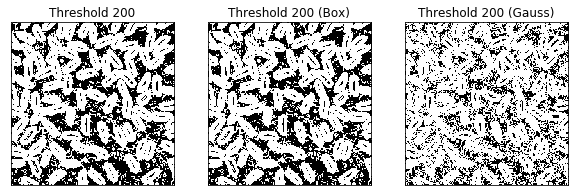

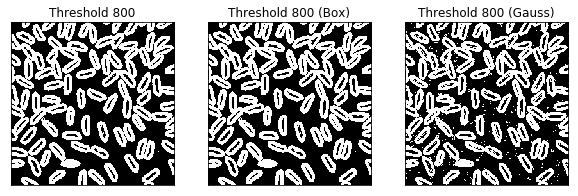

In [217]:
THRESH_1 = 200
THRESH_2 = 500

# Apply first box and gaussian w/ threshold
ret_1, img_1 = cv2.threshold(I_m, THRESH_1, 255, cv2.THRESH_BINARY)
ret_box_1, img_box_1 = cv2.threshold(I_m_box, THRESH_1, 255, cv2.THRESH_BINARY)
ret_gaus_1, img_gaus_1 = cv2.threshold(I_m_gaus, THRESH_1, 255, cv2.THRESH_BINARY)

# Apply second box and gaussian w/ threshold
ret_2, img_2 = cv2.threshold(I_m, THRESH_2, 255, cv2.THRESH_BINARY)
ret_box_2, img_box_2 = cv2.threshold(I_m_box, THRESH_2, 255, cv2.THRESH_BINARY)
ret_gaus_2, img_gaus_2 = cv2.threshold(I_m_gaus, THRESH_2, 255, cv2.THRESH_BINARY)

# Plot
plt.figure(figsize=(10,3))
plt.subplot(131), plt.imshow(img_1, cmap='gray')
plt.title("Threshold 200"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_box_1, cmap='gray')
plt.title("Threshold 200 (Box)"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_gaus_1, cmap='gray')
plt.title("Threshold 200 (Gauss)"), plt.xticks([]), plt.yticks([])

plt.figure(figsize=(10,3))
plt.subplot(131), plt.imshow(img_2, cmap='gray')
plt.title("Threshold 800"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img_box_2, cmap='gray')
plt.title("Threshold 800 (Box)"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img_gaus_2, cmap='gray')
plt.title("Threshold 800 (Gauss)"), plt.xticks([]), plt.yticks([])
plt.show()

Using a low threshold of 200, we can see that alot of the details of the image are lost, and that there is alot of noise. This means that a large amount of the pixels have a higher magnitude than this threshold, and hence more pixels get converted to white (255) than necessary.

Using a threshold is 800 proved to be the most effective because it magnifies and sharpens the edges more. After sharpening, the boundaries of the objects are more defined which makes the edge detection give better results.

### 3.2 - Effect of denoising on edge detection

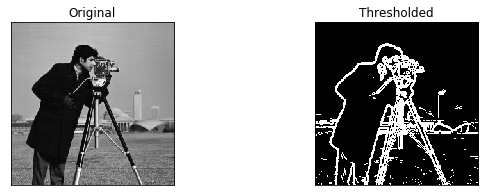

In [218]:
img_path = ('./cameraman.jpg')
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Sobel filter, kernel size 5
I_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
I_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
I_m = cv2.magnitude(I_x, I_y)

# Apply threshold
ret_1, img_1 = cv2.threshold(I_m, 1500, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(10,3))
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title("Original"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_1, cmap='gray')
plt.title("Thresholded"), plt.xticks([]), plt.yticks([])
plt.show()

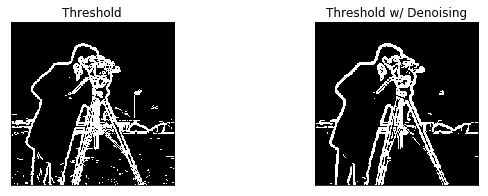

In [219]:
# Denoise image using gaussian blur
img_gauss = cv2.GaussianBlur(img, (5,5), 0)

# Apply sobel filter
img_g_X = cv2.Sobel(img_gauss, cv2.CV_64F, 1, 0, ksize=5)
img_g_Y = cv2.Sobel(img_gauss, cv2.CV_64F, 0, 1, ksize=5)
img_g_M = cv2.magnitude(img_g_X, img_g_Y)

# Apply a threshold
ret2, img_2 = cv2.threshold(img_g_M, 1500, 255, cv2.THRESH_BINARY)

# Plot
plt.figure(figsize=(10,3))
plt.subplot(121), plt.imshow(img_1, cmap='gray')
plt.title("Threshold"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_2, cmap='gray')
plt.title("Threshold w/ Denoising"), plt.xticks([]), plt.yticks([])
plt.show()

As can be seen from the above two images, applying a gaussian filter prior to sobel and thresholding has a significantly strong affect on denoising. 

By comparing the two images along with the original, we can see that the denoised image no longer has white pixel noise on the ground that the original image had. Furthermore, the cameraman clothes are a much more uniform, (without white pixel noise) which allows for a much more comphrehensible understanding of the image and its edges. 

## 3.2 - Laplacian of Gaussian

### 3.2.1

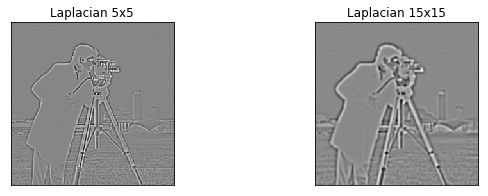

In [220]:
# Applying 5x5 Laplacian Gaussian edge detector
img_L_5 = cv2.Laplacian(img, ddepth=cv2.CV_64F, ksize=5)
img_L_15 = cv2.Laplacian(img, ddepth=cv2.CV_64F, ksize=15)

# Plot
plt.figure(figsize=(10,3))
plt.subplot(121), plt.imshow(img_L_5, cmap='gray')
plt.title("Laplacian 5x5"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_L_15, cmap='gray')
plt.title("Laplacian 15x15"), plt.xticks([]), plt.yticks([])
plt.show()

### 3.2.2

As can be seen by comparing the two images, applying a Laplacian of Gaussian with a 15 aperture size results in a more blurry image, whereas with a 5 aperture size the image is much sharper. 

The Laplacian looks at edges by calculating the second order derivative in the X and Y directions, and therefore finding points where the Laplacian changes sign. In a Laplacian Gaussian, kernels are extremely sensitive to noise, therefore increasing the Kernel size too much resilts in over emphasized areas (or the blur which we observe). 

## 3.3 - Canny Edge detection


### 3.3.1 - Canny Edge detection explain

The Canny Edge Detector has four main steps:
1. Filter image with x, y derivatives of Gaussian: Find the gradients along the horizontal and vertical axis.
2. Find the magnitude and orientation of gradient: Calculate the magnitude and phase using the derivatives x and y. 
3. Non-maximum supression : This finds the local maximum along a gradient direction and therefore thins the multi-pixel wide 'ridges/edges' to single pixel width.
4. Thresholding and linking (hysteresis): By defining two thresholds, one high and one low, we are able to remove unnecessary noise. This is done by using the high threshold to start edge curves, and low threshold to continue them. 

### 3.3.2 - Varying Hyper Parameters

[]

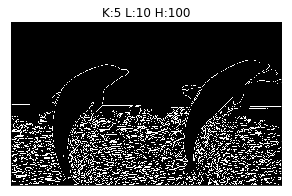

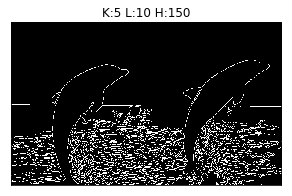

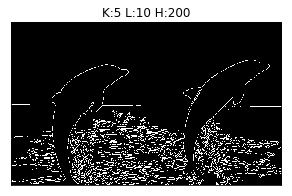

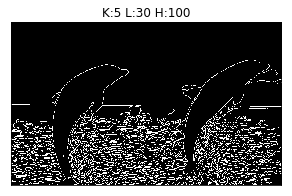

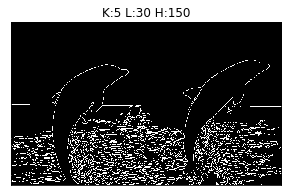

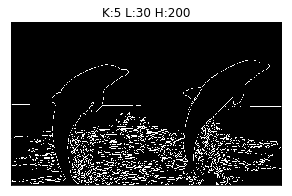

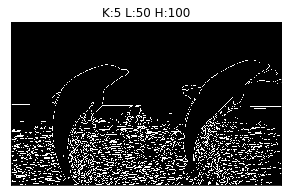

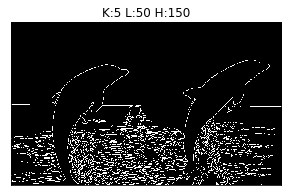

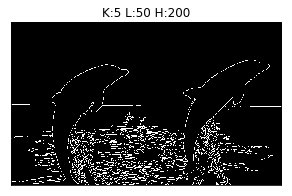

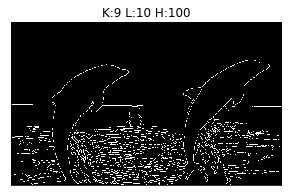

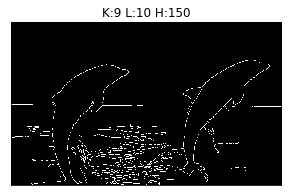

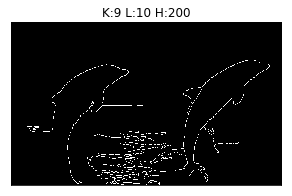

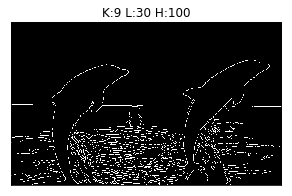

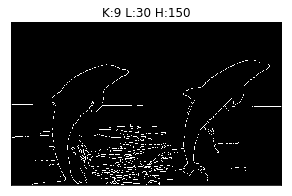

In [ ]:
img_path = './dolphin.jpg'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
height, width = img.shape

K = [5,9,13]
L = [10,30,50]
H = [100,150, 200]

Combinations = np.empty([27,3])
Titles = ["" for x in range(27)]

# Iterate over each combination of k, l and h and append combination to array
i = 0
for k in K:
    for l in L:
        for h in H:
            Combinations[i]=[k,l,h]
            Titles[i] = "K:"+str(k)+" L:"+str(l)+" H:"+str(h)
            i+=1

            
imgs = np.empty([27, height, width])

# Create a gaussian and canny filter for each combination
for i in range(0, 27):
    k = int(Combinations[i][0])
    l = int(Combinations[i][1])
    h = int(Combinations[i][2])
    img_gaussian = cv2.GaussianBlur(img, (k, k), 0)
    imgs[i] = cv2.Canny(img_gaussian, l, h)

i = 0
x = 0
# Plot each combination
for img in imgs:   
    plt.figure(figsize=(10,3))
    plt.imshow(img, cmap='gray')
    plt.title(Titles[i]), plt.xticks([]), plt.yticks([])
    i+=1
    
plt.plot()

### 3.3.3 - Relationship between hyper-parameters

The three hyper parameters being changed are K (Gaussian smoothing kernel size), L and H (which refer to the Lower and Higher thresholds used for hysteresis).

When K is increased to a higher value, we can see that information in the background is lost as the image gets more blurry and the edges become less sharp.

The parameters L and H impact how many edges are detected. Some edges are lost when L and H are changed. Any edges with intensity gradient more than H are sure to be edges and those below L are sure to be non-edges, so discarded. Those who lie between these two thresholds are classified edges or non-edges based on their connectivity. If they are connected to “sure-edge” pixels, they are considered to be part of edges. Otherwise, they are also discarded. 

As such, a medium sized K with a medium L and a high H should result in an imge which correctly detects only the edges of the dolphin. 

### 3.3.4 - Values for dolphin-edges only

In [ ]:
# Hyper params
K_1 = 17
L_1 = 50
H_1 = 200

# Read in
img_path = './dolphin.jpg'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Gaussian and Canny
img_g1 = cv2.GaussianBlur(img, (K_1, K_1), 0)
img_c1 = cv2.Canny(img_g1, L_1, H_1)

# Plot
plt.imshow(img_c1, cmap='gray')
plt.title("Dolphin-Edges only"), plt.xticks([]), plt.yticks([])
plt.show()

The values found were K=17, L=50 and H=200